# Problem 9 (20 Points)
## Problem description
So far, we have worked with ~2 dimensional problems with 2-3 classes. Most often in ML, there are many more explanatory variables and classes than this. In this problem, you'll be training logistic regression models on a database of grayscale images of hand-drawn digits, using SciKit-Learn. Now there are 400 (20x20) input features and 10 classes (digits 0-9).

As usual, you can use any code from previous problems.

## Summary of deliverables
- OvR model accuracy on training data
- OvR model accuracy on testing data
- Multinomial model accuracy on training data
- Multinomial model accuracy on testing data


### Imports and Utility Functions:


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def visualize(xdata, index, title=""):
    image = xdata[index,:].reshape(20,20).T
    plt.figure()
    plt.imshow(image,cmap = "binary")
    plt.axis("off")
    plt.title(title)
    plt.show()

## Load data
The following cell loads in training and testing data into the following variables:
- `x_train`: 4000x400 array of input features, used for training
- `y_train`: Array of ground-truth classes for each point in `x_train`
- `x_test`: 1000x400 array of input features, used for testing
- `y_test`: Array of ground-truth classes for each point in `x_test`


You can visualize a digit with the `visualize(x_data, index)` function.

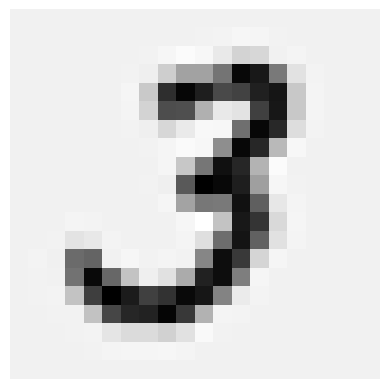

In [14]:
x_train = np.load("data/w3-hw3-train_x.npy")
y_train = np.load("data/w3-hw3-train_y.npy")
x_test = np.load("data/w3-hw3-test_x.npy")
y_test = np.load("data/w3-hw3-test_y.npy")

visualize(x_train,1234)

## Logistic Regression Models

Use sklearn's `LogisticRegression` to fit a multinomial logistic regression model on the training data. You may need to increase the `max_iter` argument for the model to converge.

Train 2 models: one using the One-vs-Rest method, and another that minimizes multinomial loss. You can do these by setting the `multi_class` argument to "ovr" and "multinomial", respectively.  

More information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [15]:
model_1 = LogisticRegression(max_iter=10000, multi_class="ovr")
model_2 = LogisticRegression(max_iter=10000, multi_class="multinomial")

model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

## Accuracy

Compute and print the accuracy of each model on the training and testing sets as a percent.

In [16]:
train_preds_1 = model_1.predict(x_train)
train_preds_2 = model_2.predict(x_train)
test_preds_1 = model_1.predict(x_test)
test_preds_2 = model_2.predict(x_test)

train_accuracy_1 = np.sum(train_preds_1 == y_train) / len(y_train) * 100
test_accuracy_1 = np.sum(test_preds_1 == y_test) / len(y_test) * 100
train_accuracy_2 = np.sum(train_preds_2 == y_train) / len(y_train) * 100
test_accuracy_2 = np.sum(test_preds_2 == y_test) / len(y_test) * 100
print("    Train Accuracy (Model 1): ", train_accuracy_1, r"%")
print("    Test Accuracy (Model 1): ", test_accuracy_1, r"%")
print("    Train Accuracy (Model 2): ", train_accuracy_2, r"%")
print("    Test Accuracy (Model 2): ", test_accuracy_2, r"%")

    Train Accuracy (Model 1):  94.72500000000001 %
    Test Accuracy (Model 1):  90.7 %
    Train Accuracy (Model 2):  96.475 %
    Test Accuracy (Model 2):  91.4 %
